<a href="https://colab.research.google.com/github/Bruno-Noriaki/Imoveis/blob/main/Investimento_Im%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini Projeto - Módulo 3


DataSet utilizado está disponível em: https://www.kaggle.com/datasets/shivachandel/kc-house-data

##**1.Problematização**

A empresa te contratou pois quer saber qual seria os 5 imóveis que ela deveria investir e o porquê e quais 5 você não recomendaria o investimento de jeito nenhum. Você deve montar um colab bem redigido mostrando o passo a passo das etapas de análise do case, fazendo uma introdução e dados atuais sobre o problema. Também é importante ressaltar/explicar passagens complexas ou insights que você tiver durante a resolução desse projeto

In [ ]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots as mk

In [ ]:
#Importação dos dados
data = pd.read_csv('/content/kc_house_data.csv')

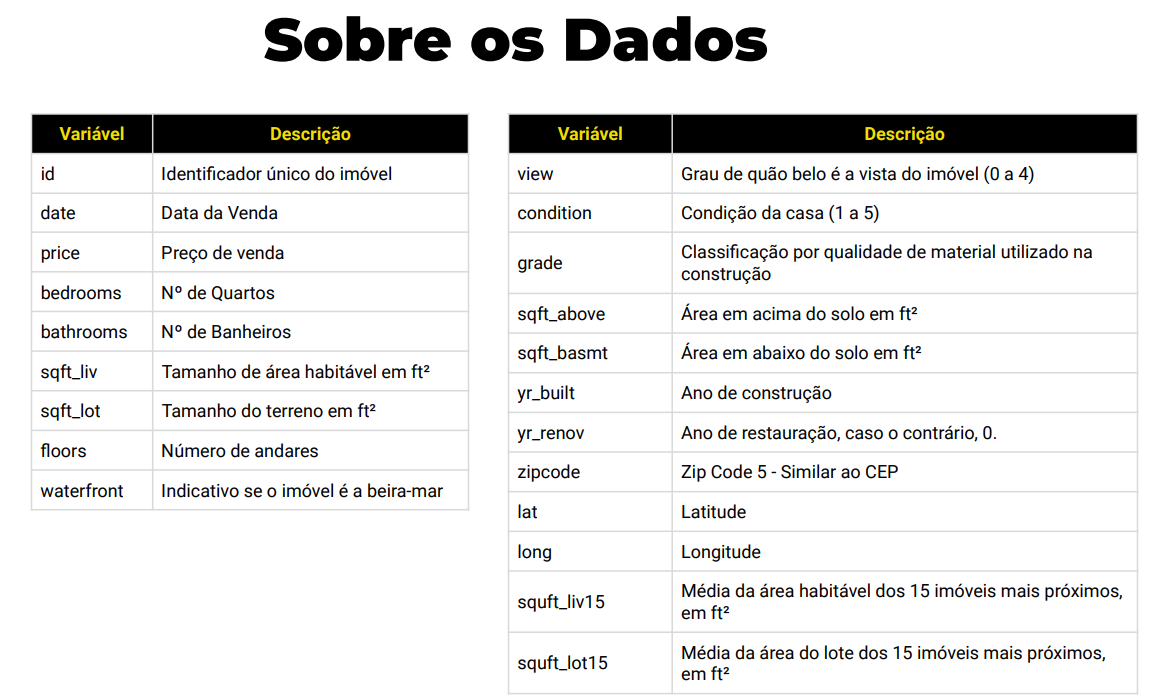

#2.Análise dos dados

In [ ]:
data.info()
data.drop_duplicates()
#Sem dados nulos, datas em formato diferente
#Sem dados repetidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
pd.DataFrame(data['price'].describe())
#Há grande diferença entre os preços máximo e mínimo e grande variação nos quartis
#Alto desvio padrão, indicando uma variação grande nos preços

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


#3.Alterando os Formatos das datas

In [ ]:
#Alteração de formato da data
data['date'] = data['date'].apply(lambda x: x.split('T')[0])

In [ ]:
data['date'] = pd.to_datetime(data['date'], format = '%Y%m%d')
data['date']
data['year'] = data['date'].apply(lambda x: x.year)

In [ ]:
data['yr_built'] = pd.to_datetime(data['yr_built'], format = '%Y')
data['yr_built'] =  data['yr_built'].apply(lambda x: x.year)

#4.Análise das variáveis em relação ao preço

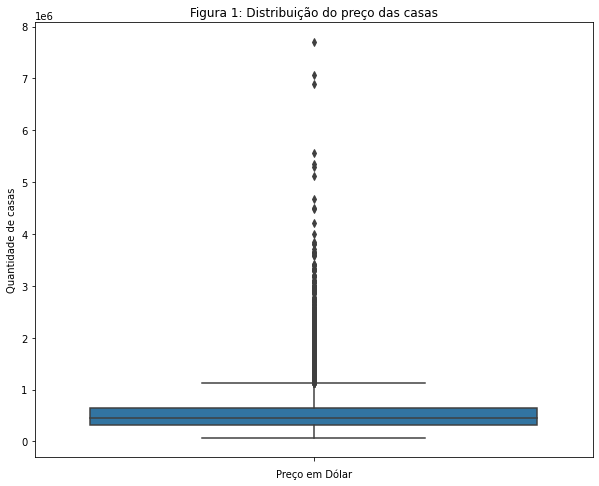

In [ ]:
fig, axes = plt.subplots(nrows =1 ,figsize = (10,8))
sns.boxplot(y = data['price']);
plt.title('Figura 1: Distribuição do preço das casas');
plt.xlabel('Preço em Dólar');
plt.ylabel('Quantidade de casas');
#Nota-se uma grande quantidade de vendas de casas abaixo de 1 milhão
#Contudo há valores muito diversos e com muitos outliers

#5.Análise de variáveis Categóricas

Análise de variáveis Categóricas númericas (price, bathrooms, bedrooms, waterfront, view, condition, grade) e Comparação com imóveis renovados e não renovados

In [ ]:
rev = data[data['yr_renovated']>0]
rev.shape

(914, 22)

In [ ]:
data['renovado'] = data['yr_renovated'].apply(lambda x: int(x/x) if(x>0) else int(x))

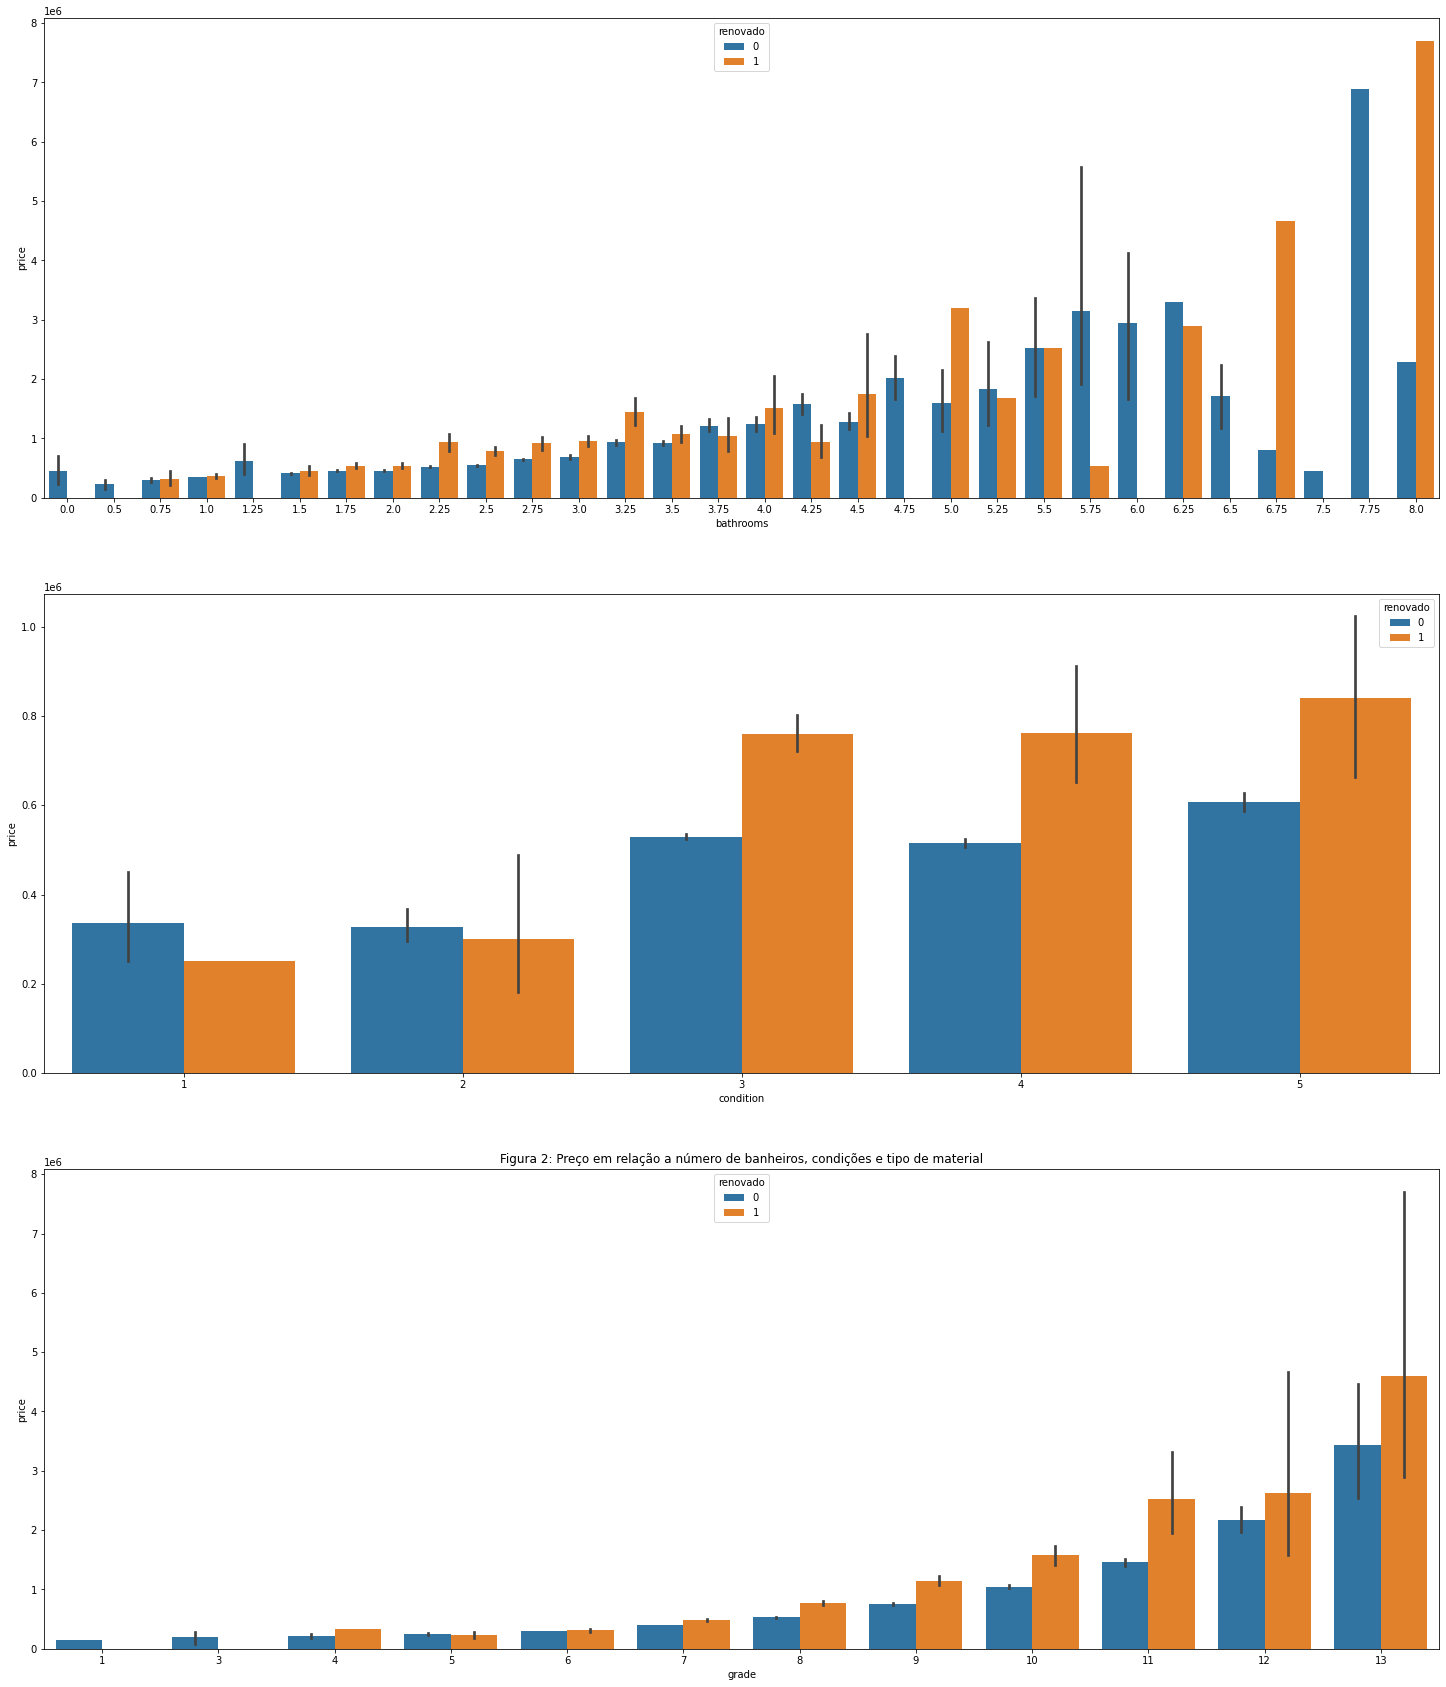

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (25,30))
sns.barplot(x = data['bathrooms'], y = data['price'], ax = axes[0], hue = data['renovado']);
sns.barplot(x = data['condition'], y = data['price'], ax = axes[1], hue = data['renovado']);
sns.barplot(x = data['grade'], y = data['price'], ax = axes[2], hue = data['renovado']);
plt.title('Figura 2: Preço em relação a número de banheiros, condições e tipo de material');

#Acerca dos banheiros, nota-se valores racionais que não fazem sentido para essa medida
#Além disso, nota-se um aumento no preço com o aumento também no número de banheiros
#Já sobre a condição, há um aumento no preço até o valor 3, a partir disso, o aumento não é tão relevante
#Sobre a grade, nota-se um aumento bastante proporcional com o tipo de material
#Para baixas condições, a renovação abaixou o preço, já para altas condições, o preço
#após a renovação foi maior

In [ ]:
bath = data.groupby('bathrooms').mean()
lista = bath['price'].to_list()
a = len(lista)
var = [0]
for i in range(1,a):
  j = lista[i]
  v = lista[i-1]
  var.append(j-v)

bath['variação'] = var
bath[['price','variação']].sort_values('variação')

#Nota-se uma grande variação de preços de 7,5 banheiros para 7,75 banheiros

,price,variação
bathrooms,,
7.50,4.500000e+05,-2.284000e+06
8.00,4.990000e+06,-1.895000e+06
6.50,1.709445e+06,-1.384555e+06
5.00,1.673492e+06,-3.478120e+05
1.50,4.093222e+05,-2.118945e+05
0.50,2.373750e+05,-2.107850e+05
4.50,1.333620e+06,-1.921542e+05
3.50,9.319331e+05,-3.840664e+04
5.75,2.492500e+06,-2.980000e+04


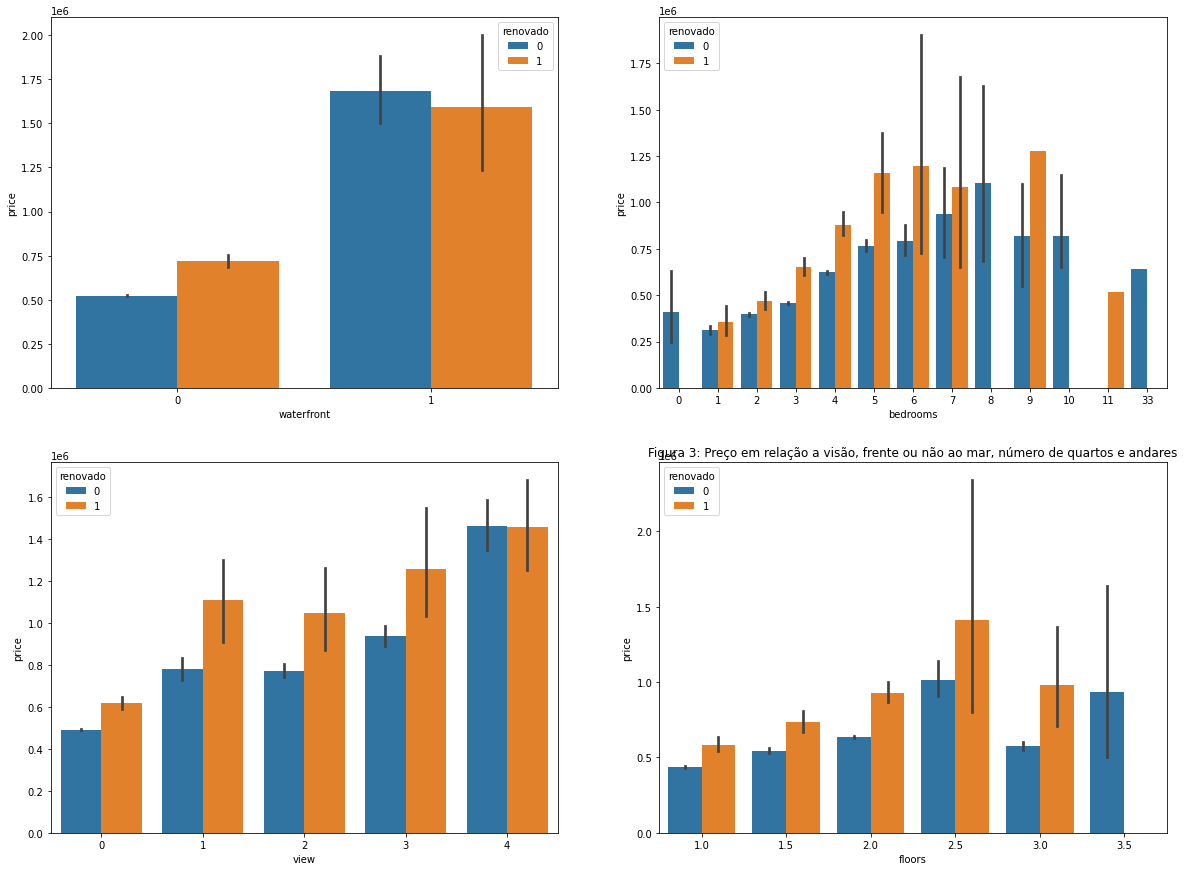

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))
sns.barplot(x = data['waterfront'], y = data['price'], ax = axes[0][0], hue = data['renovado']);
plt.title('Figura 3: Preço em relação a visão, frente ou não ao mar, número de quartos e andares',loc='center');
sns.barplot(x = data['bedrooms'], y = data['price'], ax = axes[0][1], hue = data['renovado']);
sns.barplot(x = data['view'], y = data['price'], ax = axes[1][0], hue = data['renovado']);
sns.barplot(x = data['floors'], y = data['price'], ax = axes[1][1], hue = data['renovado']);

#Nota-se um aumento bastante significativo com o fato da casa ser em frente ao mar
#O número de quartos é proporcional ao preço até 8 quartos, a partir disso, esse parâmetro não é relevante
#E sobre a vista, há um aumento entre 0 e 1, que se mantém quase constante até 3 e sobe em 4

In [ ]:
room = data.groupby('bedrooms').mean()
lista = room['price'].to_list()
b = len(lista)
var = [0]
for i in range(1,b):
  j = lista[i]
  v = lista[i-1]
  var.append(j-v)

room['variação'] = var
room[['price','variação']].sort_values('variação')

#Nota-se uma grande variação de preços para casa de 4 quartos em relação a de 3 quartos,
#Depois de 7 para 8 quartos, 4 para 5 quartos

,price,variação
bedrooms,,
11,5.200000e+05,-299333.333333
9,8.939998e+05,-211077.089744
1,3.176429e+05,-91860.961732
10,8.193333e+05,-74666.500000
0,4.095038e+05,0.000000
6,8.255206e+05,38920.807172
3,4.662321e+05,64859.396597
2,4.013727e+05,83729.797462
33,6.400000e+05,120000.000000


#6.Analisando o aumento do preço em função da data de construção

In [ ]:
#Para facilitar, separados em décadas
label =['1900-1910','1911-1920','1921-1930','1931-1940','1941-1950','1951-1960',
        '1961-1970','1971-1980','1981-1990','1991-2000','2001-2010','2011-2020']
bin = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
data['Decade'] =  pd.cut(data['yr_built'], bin, labels = label, include_lowest = True)

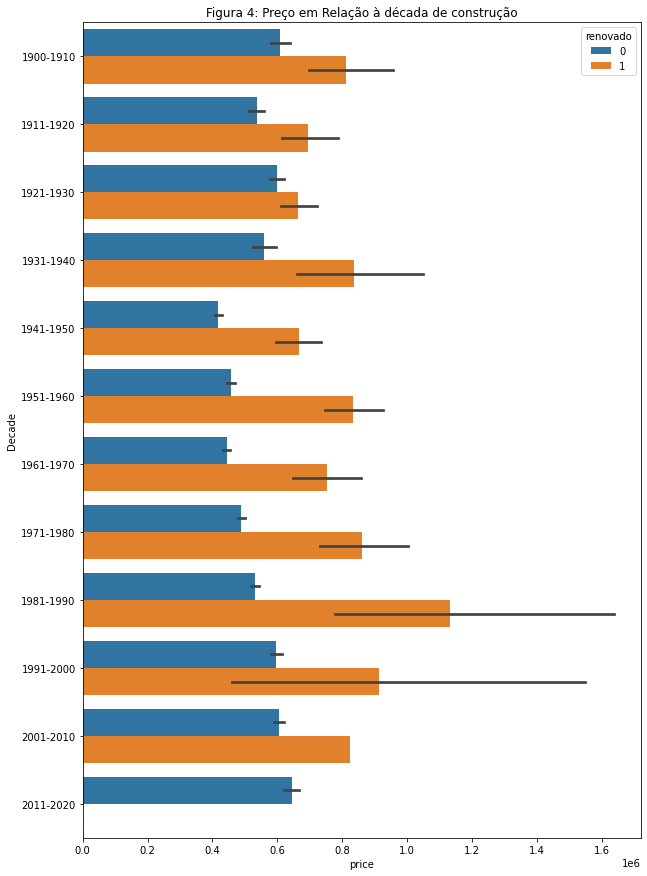

In [ ]:
fig, axes = plt.subplots(nrows = 1, figsize = (10,15))
sns.barplot(y = data['Decade'], x = data['price'], hue = data['renovado']);
plt.title('Figura 4: Preço em Relação à década de construção');
#Casas mais antigas apresentam valor maior, assim como casas mais recentes, contudo
#O meio termo não é tão valorizado
#A renovação é mais relevante em casas da década de 1981 a 1990

#7.Análise em relação à localização

Determinação das cidades a partir dos dados expostos
Biblioteca geopy

In [ ]:
#Instação e importação da Biblioteca
!pip install uszipcode
from uszipcode import SearchEngine
engine = SearchEngine()

cidades = []
for i  in data['zipcode']:
  zipcode = engine.by_zipcode(i)
  cidades.append(zipcode.major_city)
data['city'] = cidades

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 3.1 MB/s 
     |████████████████████████████████| 121 kB 36.7 MB/s 


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


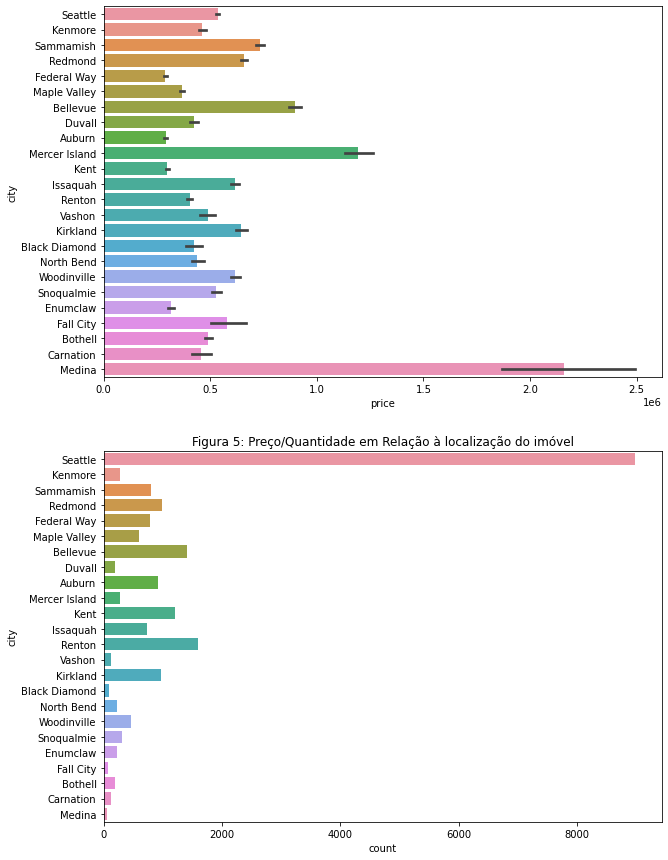

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,15))
sns.barplot(x = data['price'], y = data['city'], ax = axes[0]);
sns.countplot(y = data['city'], ax = axes[1]);
plt.title('Figura 5: Preço/Quantidade em Relação à localização do imóvel');

#Preços mais altos em Medina, Mercer Island Bellevue
#Porém muitas vendas em Seattle, talvez indicando uma maior procura
#As condições, contudo, são muito semelhantes nas diversas cidades

In [ ]:
data['city'].value_counts(normalize=True)

Seattle          0.415352
Renton           0.073891
Bellevue         0.065100
Kent             0.055661
Redmond          0.045297
Kirkland         0.045204
Auburn           0.042197
Sammamish        0.037015
Federal Way      0.036043
Issaquah         0.033915
Maple Valley     0.027298
Woodinville      0.021792
Snoqualmie       0.014343
Kenmore          0.013094
Mercer Island    0.013048
Enumclaw         0.010827
North Bend       0.010225
Bothell          0.009022
Duvall           0.008791
Carnation        0.005737
Vashon           0.005460
Black Diamond    0.004627
Fall City        0.003748
Medina           0.002313
Name: city, dtype: float64

In [ ]:
data.groupby(['city']).mean()[['price']].sort_values('price')

,price
city,
Federal Way,2.893849e+05
Auburn,2.914815e+05
Kent,2.995499e+05
Enumclaw,3.157093e+05
Maple Valley,3.668676e+05
Renton,4.034429e+05
Black Diamond,4.236660e+05
Duvall,4.247887e+05
North Bend,4.394711e+05


#8.Análise dos Preços de Revenda

In [ ]:
revenda = data[data.duplicated(subset=['id'],keep = False)].sort_values(['id','date']).reset_index(drop=True)

lista_id = revenda['id'].unique()

In [ ]:
lucro = []
for i in lista_id:
  aux = data[data['id']==i]['price'].to_list()
  Lucro = aux[-1]-aux[0]
  lucro.append(Lucro)

In [ ]:
revenda = revenda.drop_duplicates(subset='id',keep='last').reset_index(drop=True)
revenda['Lucro'] = lucro

In [ ]:
revenda.groupby(['city']).mean()[['Lucro']].sort_values('Lucro')
#Cidades que apresentaram maior lucro Bothell, Seattle e Kirkland

,Lucro
city,
Black Diamond,-40000.000000
Issaquah,4000.000000
Carnation,27500.000000
Snoqualmie,40544.666667
Medina,65000.000000
Maple Valley,78333.333333
Redmond,78630.833333
Auburn,83980.000000
Federal Way,85361.090909


#9.Escolha dos imóveis

Conclui-se que as melhores casas para investimentos teriam

*   1.00, 5.75, 3.75, 4.5 e 5.5 banheiros
*   3, 7 ou 4 quartos
*   Localizam-se em Seattle

In [ ]:
sel_bath1 = data[data['bathrooms'] == 1.0]
sel_bath2 = data[data['bathrooms'] == 5.75]
sel_bath3 = data[data['bathrooms'] == 3.75]
sel_bath4 = data[data['bathrooms'] == 4.5]
sel_bath5 = data[data['bathrooms'] == 5.5]

bath = pd.concat([sel_bath1,sel_bath2,sel_bath3,sel_bath4,sel_bath5])

In [ ]:
sel_room1 = bath[bath['bedrooms'] == 3]
sel_room2 = bath[bath['bedrooms'] == 7]
sel_room3 = bath[bath['bedrooms'] == 4]

room = pd.concat([sel_room1,sel_room2,sel_room3])

In [ ]:
decade = room[room['Decade']=='1981-1990']

In [ ]:
sel_final = decade[decade['city']=='Seattle']
sel_final['id']

841      6450303785
1596     3333002440
4455     1568100386
8552     3972900195
15521    3052700225
Name: id, dtype: int64

Assim, as melhores escolhas para investimento seriam de as casas de ID 6450303785, 3333002440, 1568100386, 3972900195, 3052700225

Já as piores casas teriam como características:



*   7.5, 8.0, 6.5, 5.0, 1.5 banheiros
*   11, 9, 1, 10 ou 0 quartos
*   Década de 1911 a 1920


In [ ]:
sel_bath1 = data[data['bathrooms'] == 7.5]
sel_bath2 = data[data['bathrooms'] == 8]
sel_bath3 = data[data['bathrooms'] == 6.5]
sel_bath4 = data[data['bathrooms'] == 5]
sel_bath5 = data[data['bathrooms'] == 1.5]

bath = pd.concat([sel_bath1,sel_bath2,sel_bath3,sel_bath4,sel_bath5])

In [ ]:
sel_room1 = bath[bath['bedrooms'] == 11]
sel_room2 = bath[bath['bedrooms'] == 9]
sel_room3 = bath[bath['bedrooms'] == 1]
sel_room4 = bath[bath['bedrooms'] == 10]
sel_room5 = bath[bath['bedrooms'] == 0]

room = pd.concat([sel_room1,sel_room2,sel_room3,sel_room4,sel_room5])

In [ ]:
sel_final = room[room['city']!='Seattle']
sel_final = pd.concat([sel_final,room[room['Decade'] =='1911-1920']])
sel_final['id']

4832     2591010290
9406     2026079055
16866    7841300285
17804    5561401530
2156     4315700390
Name: id, dtype: int64

Assim, as piores casas para se investir tem o ID de 2591010290, 2026079055 , 7841300285, 5561401530, 4315700390